In [7]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [8]:
df_translations = pd.read_csv("../data/translations/experiment_results.csv")
translation_norm = "translation_norm"

metrics = ['Dice 3D [%]', 'IoU 3D [%]', 'Chamfer distance 3D [mm]', 'Avg Iou 2D [%]', 'Avg Dice 2D [%]']
df_translations

,Unnamed: 0,translation,translation_norm,scale,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm],Avg IoU 2D [%],Avg Dice 2D [%]
0,0,"[-50, -50]",70.710678,1,NaN,31.870670,18.956044,5.037490,0.666667,0.666667
1,1,"[-50, -40]",64.031242,1,NaN,30.044843,17.678100,4.417336,0.666667,0.666667
2,2,"[-50, -30]",58.309519,1,NaN,29.052632,16.995074,4.283789,0.666667,0.666667
3,3,"[-50, -20]",53.851648,1,NaN,30.327869,17.874396,3.998674,0.666667,0.666667
4,4,"[-50, -10]",50.990195,1,NaN,35.483871,21.568627,3.746943,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...
95,95,"[40, 0]",40.000000,1,NaN,30.738523,18.160377,3.840124,0.777778,0.833333
96,96,"[40, 10]",41.231056,1,NaN,29.317269,17.176471,4.004577,0.666667,0.666667
97,97,"[40, 20]",44.721360,1,NaN,31.836735,18.932039,4.241339,0.666667,0.666667
98,98,"[40, 30]",50.000000,1,NaN,30.277186,17.839196,4.446028,0.666667,0.666667


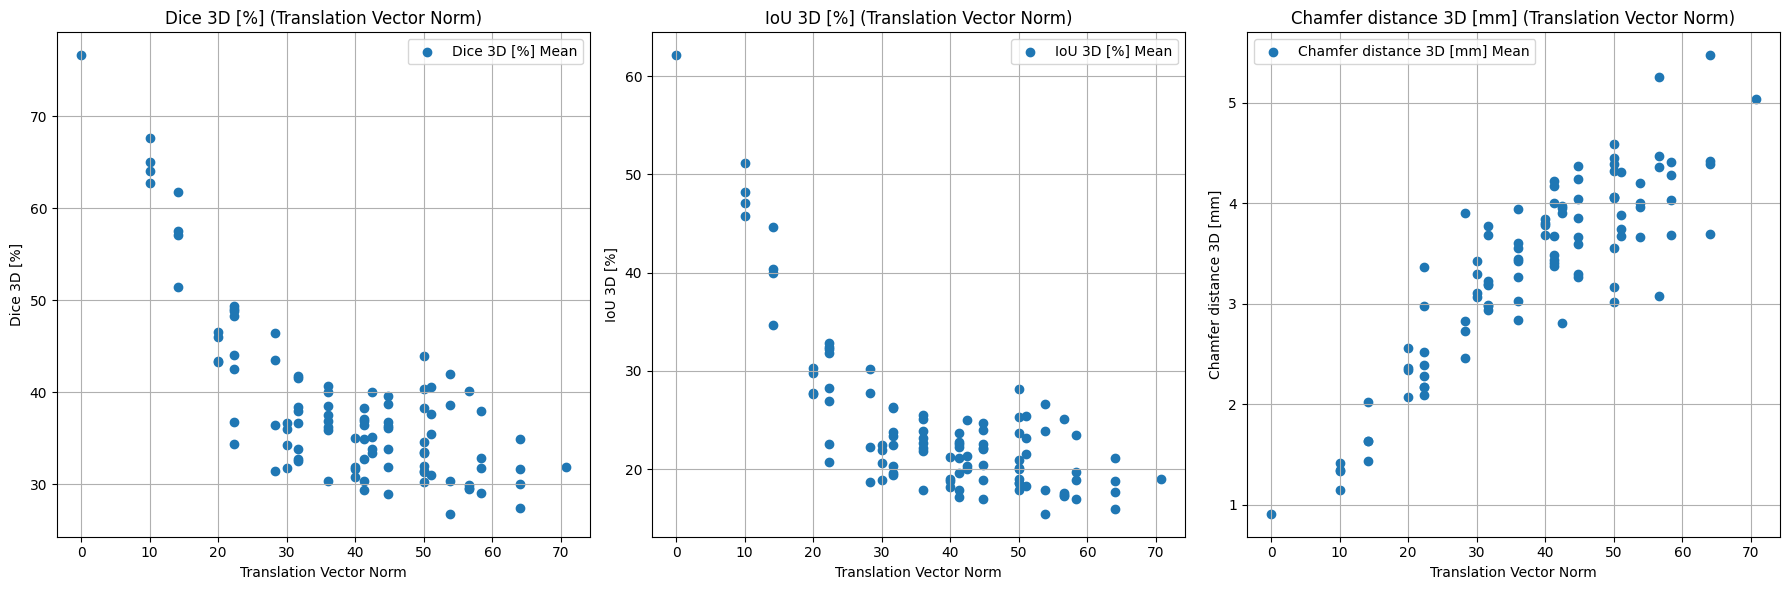

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics[:3]):
    mean_values = df_translations[metric]
    var_values = df_translations[metric]
    axes[i].scatter(df_translations[translation_norm], mean_values, label=f'{metric} Mean', marker='o')
    axes[i].set_title(f'{metric} (Translation Vector Norm)')
    axes[i].set_xlabel('Translation Vector Norm')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.savefig('figures/metric_translation.png')
plt.show()


In [13]:
df_scaling = pd.read_csv("../data/scaling/experiment_results.csv")
scale = "scale"

metrics = ['Dice 3D [%]', 'IoU 3D [%]', 'Chamfer distance 3D [mm]', 'Avg Iou 2D [%]', 'Avg Dice 2D [%]']

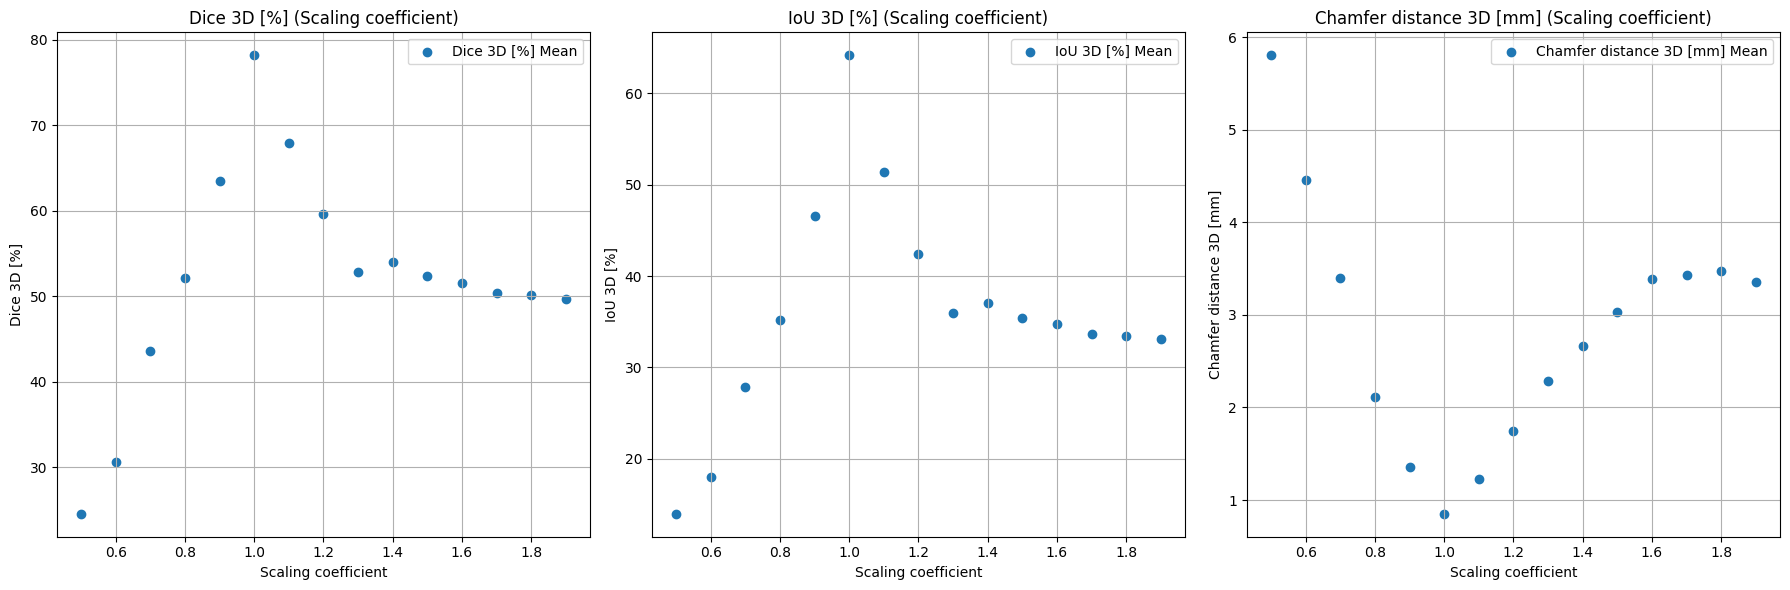

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics[:3]):
    mean_values = df_scaling[metric]
    var_values = df_scaling[metric]
    axes[i].scatter(df_scaling[scale], mean_values, label=f'{metric} Mean', marker='o')
    axes[i].set_title(f'{metric} (Scaling coefficient)')
    axes[i].set_xlabel('Scaling coefficient')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.savefig('figures/metric_scaling.png')
plt.show()